# 기상 데이터를 이용한 올 겨울 날씨 예측
- 배경 : 날씨는 누구에게나 관심있는 정보
- 목표 : 이번 겨울 최저 기온 예측
- 기대효과 : 날씨 예측을 통해 기본적 기상 정보 제공 및 한파 대비, 의사결정에 도움


- 18년도, 19년도, 20년도 초 춘천 겨울 날씨 데이터

In [92]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

## 1. Data Load & EDA

In [93]:
# 1. 데이터 불러오기
weather = pd.read_csv("./data/project/weather.csv", engine='python')

In [94]:
# 1-1. 데이터 타입 및 null값 확인
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       181 non-null    int64  
 1   지점명      181 non-null    object 
 2   일시       181 non-null    object 
 3   평균기온     181 non-null    float64
 4   최저기온     181 non-null    float64
 5   최고기온     181 non-null    float64
 6   최대 풍속    181 non-null    float64
 7   평균 상대습도  181 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 11.4+ KB


In [95]:
# 1-2. 데이터 구조 확인
print("weather.index =", weather.index)
print("weather.columns =", weather.columns)
print("weather.shape =", weather.shape)

weather.index = RangeIndex(start=0, stop=181, step=1)
weather.columns = Index(['지점', '지점명', '일시', '평균기온', '최저기온', '최고기온', '최대 풍속', '평균 상대습도'], dtype='object')
weather.shape = (181, 8)


In [96]:
# 1-3. 전체적인 데이터 확인
weather

,지점,지점명,일시,평균기온,최저기온,최고기온,최대 풍속,평균 상대습도
0,101,춘천,2018-12-01,1.5,-3.6,10.6,2.7,69.0
1,101,춘천,2018-12-02,1.8,-3.3,7.2,1.5,79.8
2,101,춘천,2018-12-03,5.3,2.3,7.1,1.5,93.1
3,101,춘천,2018-12-04,7.1,1.2,11.5,4.4,81.4
4,101,춘천,2018-12-05,0.1,-4.4,3.7,2.2,63.1
...,...,...,...,...,...,...,...,...
176,101,춘천,2020-02-25,4.4,1.6,7.5,4.5,84.6
177,101,춘천,2020-02-26,3.6,-0.9,8.5,4.0,76.5
178,101,춘천,2020-02-27,4.6,0.4,11.0,3.0,66.0
179,101,춘천,2020-02-28,2.3,-0.7,4.4,1.8,87.8


In [97]:
# 1-4 훈련 및 검증 데이터 분리, 타깃값 분리
from sklearn.model_selection import train_test_split

del weather['지점']
y = weather['최저기온']
del weather['최저기온']
X = weather.iloc[:,2:]
time = weather['일시']
#time = time.astype(np.datetime64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
train_time, test_time = train_test_split(time, test_size=0.2, random_state=32)

In [98]:
# 1-5 변수간 상관관계 확인
print("X_train 상관계수 =\n", X_train.corr())
print()
print("X_test 상관계수 =\n", X_test.corr())

X_train 상관계수 =
              평균기온      최고기온     최대 풍속   평균 상대습도
평균기온     1.000000  0.814726  0.142869  0.358370
최고기온     0.814726  1.000000  0.028303  0.153001
최대 풍속    0.142869  0.028303  1.000000 -0.393195
평균 상대습도  0.358370  0.153001 -0.393195  1.000000

X_test 상관계수 =
              평균기온      최고기온     최대 풍속   평균 상대습도
평균기온     1.000000  0.924330 -0.019255  0.642676
최고기온     0.924330  1.000000 -0.059624  0.534712
최대 풍속   -0.019255 -0.059624  1.000000 -0.342901
평균 상대습도  0.642676  0.534712 -0.342901  1.000000


## 2. Data Visualization


### 2-1) 변수의 Histogram 및 Scattert 확인
- 다중공선성 : 독립 변수간의 상관관계가 강하게 나타나 회귀 분석에 악영향을 주는 경우
- 평균기온과 최고기온의 선형성이 보임. 둘 중 평균기온 변수를 사용하기로함

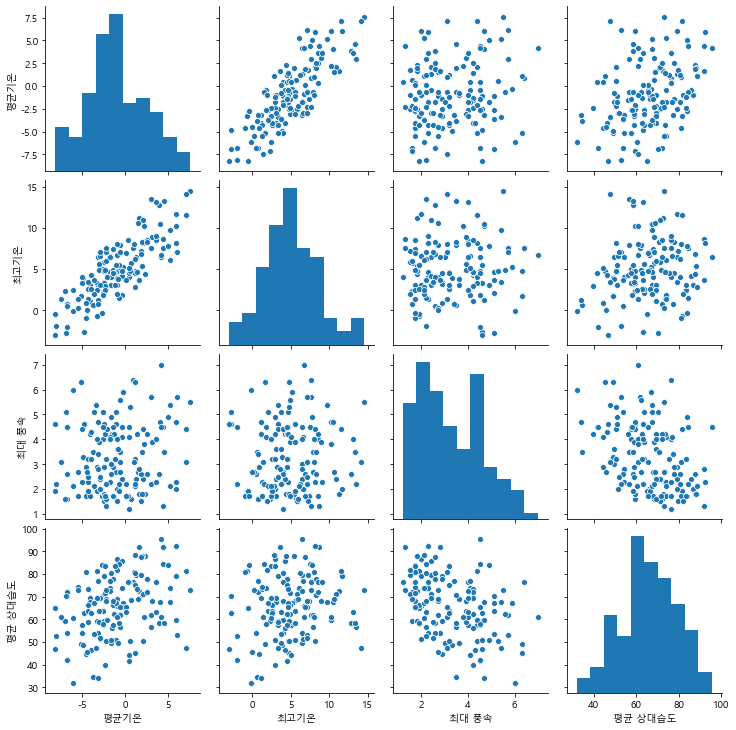

In [99]:
plt.rc("font", family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
sns.pairplot(X_train)

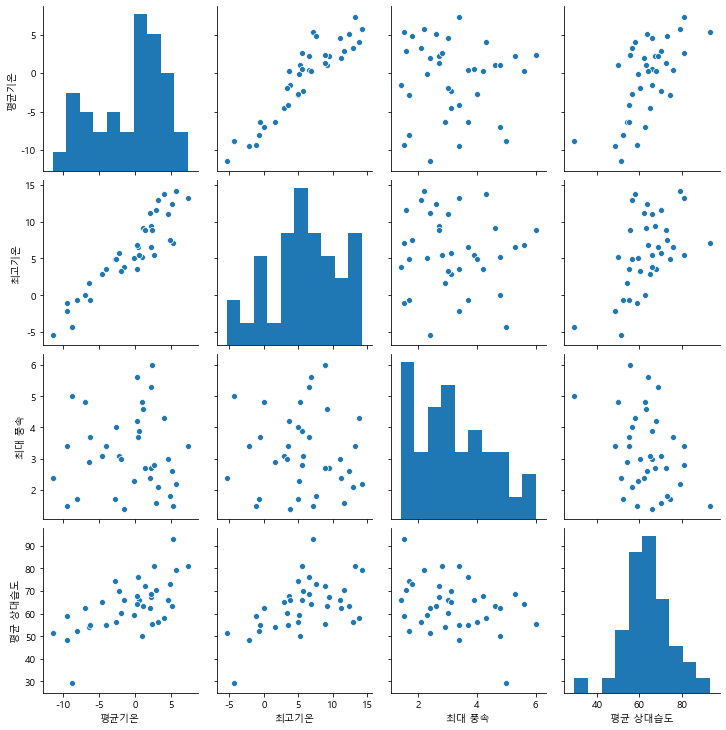

In [100]:
sns.pairplot(X_test)

In [78]:
del X_train['최고기온']
del X_test['최고기온']

### 2-2) 타깃값(최저기온)의 그래프 확인

Text(0.5, 0, '날짜')

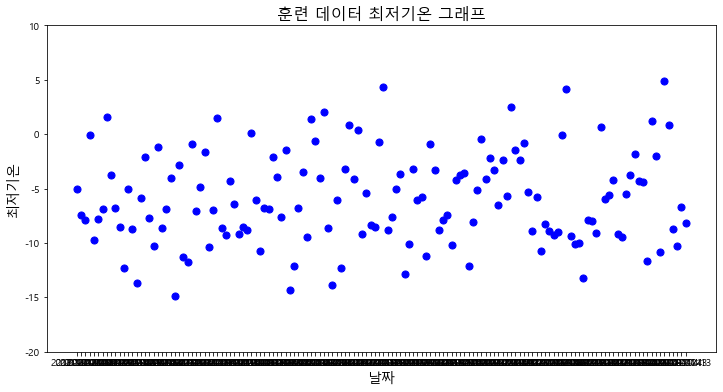

In [42]:
plt.figure(1, figsize=(12, 6))
plt.scatter(x=train_time, y=y_train, s=50, c='Blue')
plt.ylim(-20, 10)
plt.title("훈련 데이터 최저기온 그래프", fontsize=16)
plt.ylabel("최저기온", fontsize=14)
plt.xlabel("날짜", fontsize=14)

Text(0.5, 0, '날짜')

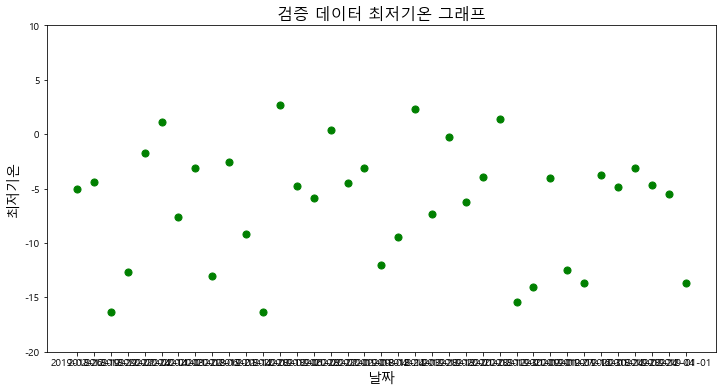

In [43]:
plt.figure(1, figsize=(12, 6))
plt.scatter(x=test_time, y=y_test, s=50, c='green')
plt.ylim(-20, 10)
plt.title("검증 데이터 최저기온 그래프", fontsize=16)
plt.ylabel("최저기온", fontsize=14)
plt.xlabel("날짜", fontsize=14)

## 3. Modeling
- 특성 3개(평균기온, 최대풍속, 평균 상대습도)를 이용한 다중선형회귀
- 훈련 데이터의 score는 0.89, 검증 데이터의 score는 0.91

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
w = model.coef_
b = model.intercept_
print("w (model.coef_):",w)        # 계수
print("b (model.intercept_):",b)   # 절편

w (model.coef_): [1.0301229  0.2530931  0.05457236]
b (model.intercept_): -9.400772486850842


In [80]:
print("훈련 데이터 score: %.2f"%(model.score(X_train, y_train)))
print("검증 데이터 score: %.2f"%model.score(X_test, y_test))

훈련 데이터 score: 0.89
검증 데이터 score: 0.91


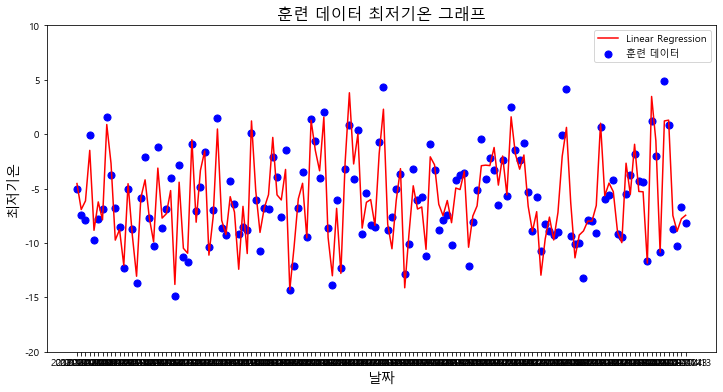

In [82]:
label=['Linear Regression','훈련 데이터']
predict = model.predict(X_train)

plt.figure(1, figsize=(12, 6))
plt.scatter(x=train_time, y=y_train, s=50, c='Blue')
plt.plot(predict, c='red')
plt.ylim(-20, 10)
plt.title("훈련 데이터 최저기온 그래프", fontsize=16)
plt.ylabel("최저기온", fontsize=14)
plt.xlabel("날짜", fontsize=14)
plt.legend(label)

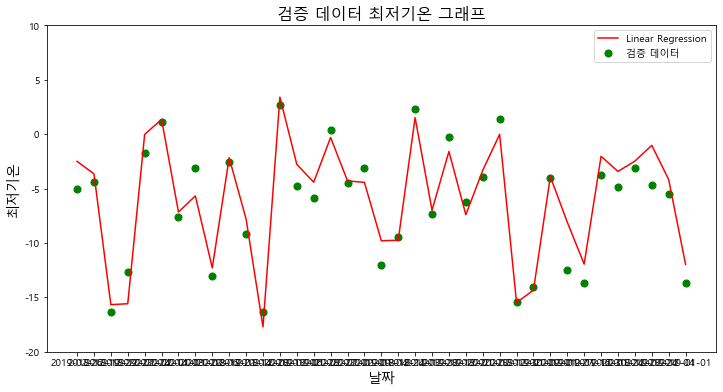

In [85]:
label=['Linear Regression','검증 데이터']
predict = model.predict(X_test)

plt.figure(1, figsize=(12, 6))
plt.scatter(x=test_time, y=y_test, s=50, c='green')
plt.plot(predict, c='red')
plt.ylim(-20, 10)
plt.title("검증 데이터 최저기온 그래프", fontsize=16)
plt.ylabel("최저기온", fontsize=14)
plt.xlabel("날짜", fontsize=14)
plt.legend(label)

## 4. New Data Predict
- 임의의 데이터를 만들어 최저기온을 예측해본다.

In [89]:
new_X = np.array([3.2, 4.1, 70])
# 최고기온 3.2, 최대 풍속 4.1, 평균 상대습도 70

In [90]:
model.predict(new_X.reshape(1, -1))

array([-1.24663211])